In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product

In [4]:
df = pd.read_csv("Walmart DataSet.csv")

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()
display(df)

<ipython-input-6-01138f5ffc90>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-01-10,5,283178.12,0,71.10,2.603,212.226946,6.768
2010-01-10,15,566945.95,0,59.69,2.840,132.756800,8.067
2010-01-10,42,481523.93,0,86.01,3.001,126.234600,9.003
2010-01-10,33,224294.39,0,91.45,3.001,126.234600,9.265
2010-01-10,36,422169.47,0,74.66,2.567,210.440443,8.476
...,...,...,...,...,...,...,...
2012-12-10,41,1409544.97,0,39.38,3.760,199.053937,6.195
2012-12-10,16,491817.19,0,43.26,3.760,199.053937,5.847
2012-12-10,10,1713889.11,0,76.03,4.468,131.108333,6.943


In [7]:
df.index

DatetimeIndex(['2010-01-10', '2010-01-10', '2010-01-10', '2010-01-10',
               '2010-01-10', '2010-01-10', '2010-01-10', '2010-01-10',
               '2010-01-10', '2010-01-10',
               ...
               '2012-12-10', '2012-12-10', '2012-12-10', '2012-12-10',
               '2012-12-10', '2012-12-10', '2012-12-10', '2012-12-10',
               '2012-12-10', '2012-12-10'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-01-10 to 2012-12-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [9]:
df.Store.value_counts()

5     143
45    143
22    143
30    143
37    143
3     143
17    143
34    143
41    143
7     143
12    143
38    143
6     143
9     143
44    143
27    143
23    143
20    143
39    143
26    143
29    143
16    143
13    143
15    143
25    143
42    143
33    143
36    143
40    143
43    143
1     143
28    143
21    143
10    143
24    143
2     143
35    143
8     143
31    143
11    143
18    143
4     143
14    143
32    143
19    143
Name: Store, dtype: int64

In [10]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [11]:
# Calculate correlation between 'Unemployment' and 'Weekly_Sales' for all stores
correlation = df.groupby('Store')[['Unemployment', 'Weekly_Sales']].corr().iloc[0::2, -1].reset_index()
correlation.columns = ['Store','Employment Status', 'Correlation Value']
correlation = correlation[['Store','Correlation Value']]
correlation[-5:]

,Store,Correlation Value
40,41,-0.350630
41,42,-0.356355
42,43,-0.201954
43,44,-0.780076
44,45,-0.004041


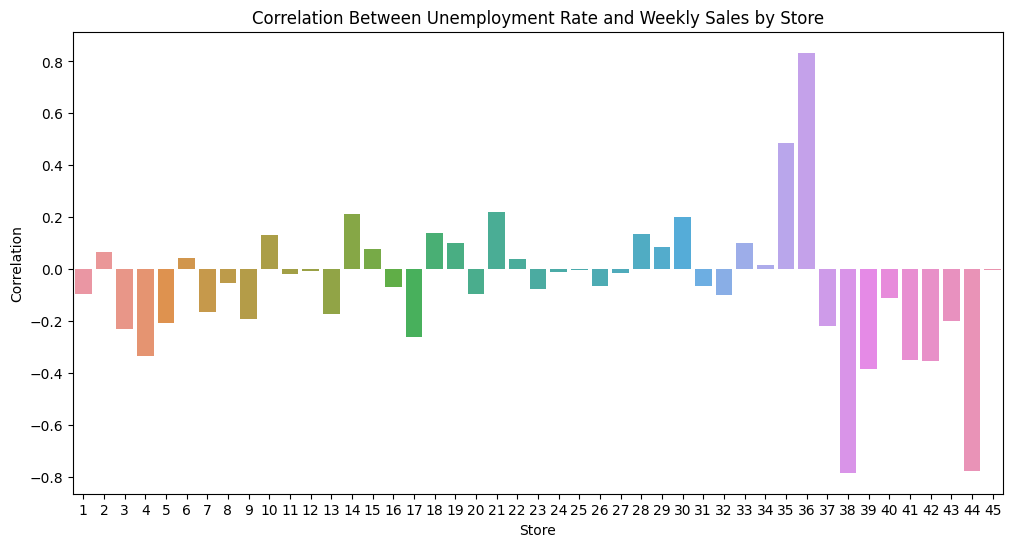

In [12]:
# Visualize the correlation
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Correlation Value', data=correlation)
plt.title('Correlation Between Unemployment Rate and Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Identify stores with the highest negative correlation
most_affected_stores = correlation.groupby('Store')['Correlation Value'].mean().sort_values().head(5)
print("Top 10 Stores Suffering the Most due to Unemployment Rate:")
print(most_affected_stores)

Top 10 Stores Suffering the Most due to Unemployment Rate:
Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
Name: Correlation Value, dtype: float64


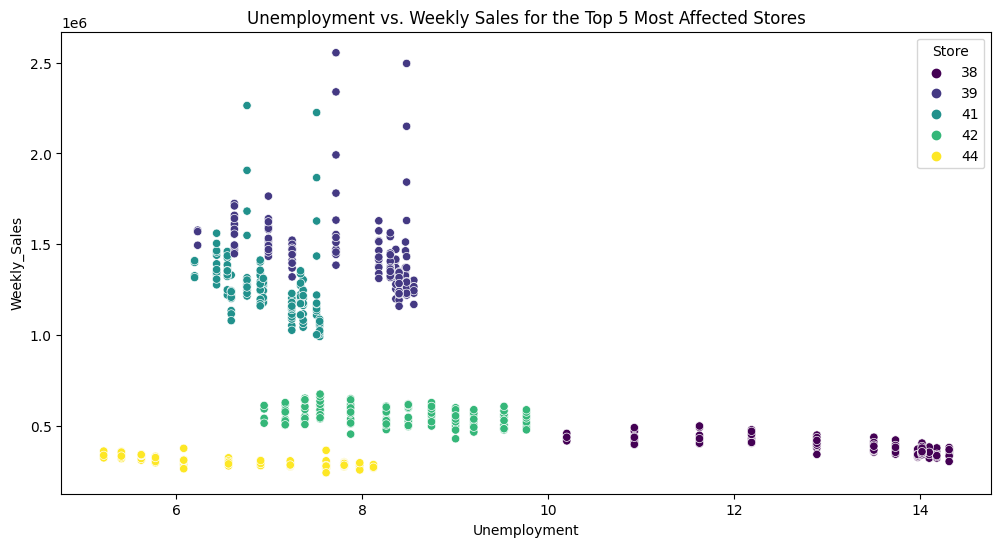

In [14]:
# Visualize the relationship between unemployment rate and sales by store

# Filter the dataframe to include only data for the top 5 affected stores
top_5_stores_data = df[df['Store'].isin(most_affected_stores.index)]

# Visualize the relationship between unemployment rate and sales by store for the top 5 stores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=top_5_stores_data, hue='Store', palette='viridis')
plt.title('Unemployment vs. Weekly Sales for the Top 5 Most Affected Stores')
plt.show()


## If the weekly sales show a seasonal trend, when and what could be the reason?


Let us first create a new dataset group by datetime and total week sales irrespective of store

In [15]:
total_sales = df.groupby(df.index)['Weekly_Sales'].sum().reset_index()

# Rename the columns for clarity
total_sales.columns = ['Date', 'Total_Weekly_Sales_K']

# Convert the 'Date' column back to a datetime index if needed
total_sales['Date'] = pd.to_datetime(total_sales['Date'])
total_sales['Total_Weekly_Sales_K'] = total_sales['Total_Weekly_Sales_K'] / 1000 # Sales in thousand
total_sales.set_index('Date', inplace=True)
total_sales.head(5)

,Total_Weekly_Sales_K
Date,
2010-01-10,42239.87587
2010-02-04,50423.83126
2010-02-07,48917.48450
2010-02-19,48276.99378
2010-02-26,43968.57113


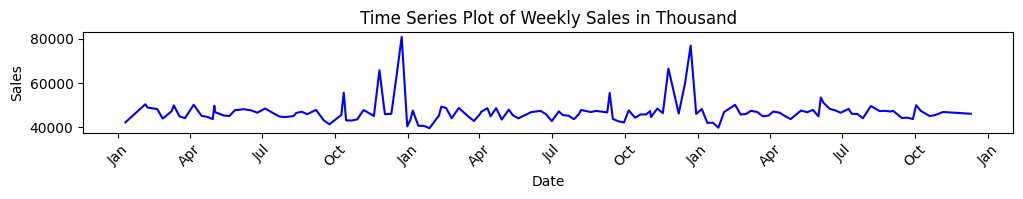

In [16]:
#Create a time series plot

from matplotlib.dates import MonthLocator, DateFormatter

plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(total_sales.index, total_sales['Total_Weekly_Sales_K'], label='Weekly Sales', color='blue')
plt.title('Time Series Plot of Weekly Sales in Thousand')
plt.xlabel('Date')
plt.ylabel('Sales')


# Create a locator and formatter for the x-axis to display quarters
quarter_locator = MonthLocator(bymonth=(1, 4, 7, 10), bymonthday=1, interval=1)
date_formatter = DateFormatter('%b')  # '%b' displays month abbreviation

# Apply the locator and formatter to the x-axis
plt.gca().xaxis.set_major_locator(quarter_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)


# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()


## Does temperature affect the weekly sales in any manner?


In [17]:
df['Temperature'].describe()

count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64

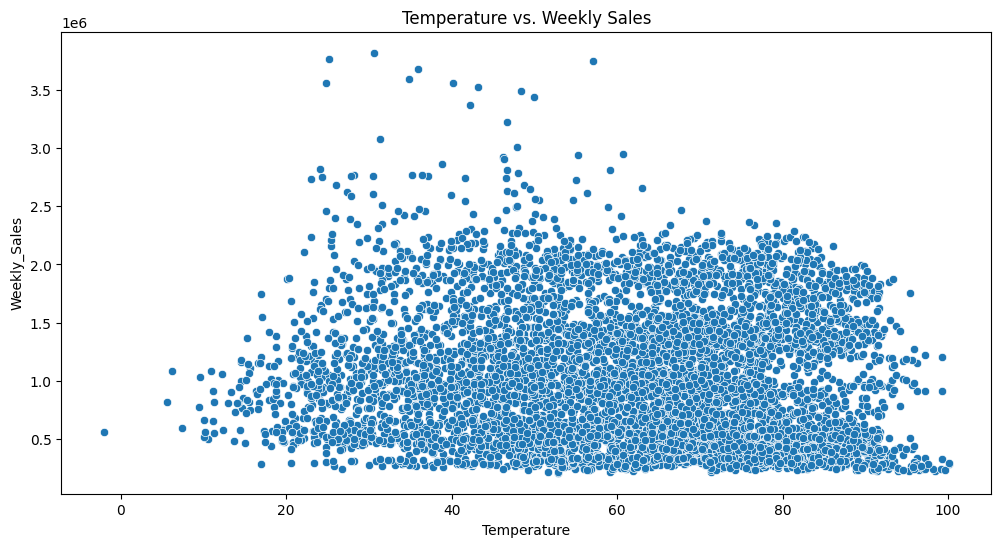

In [18]:
# Temperature vs. Weekly Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Temperature vs. Weekly Sales')
plt.show()

## How is the Consumer Price index affecting the weekly sales of various stores?

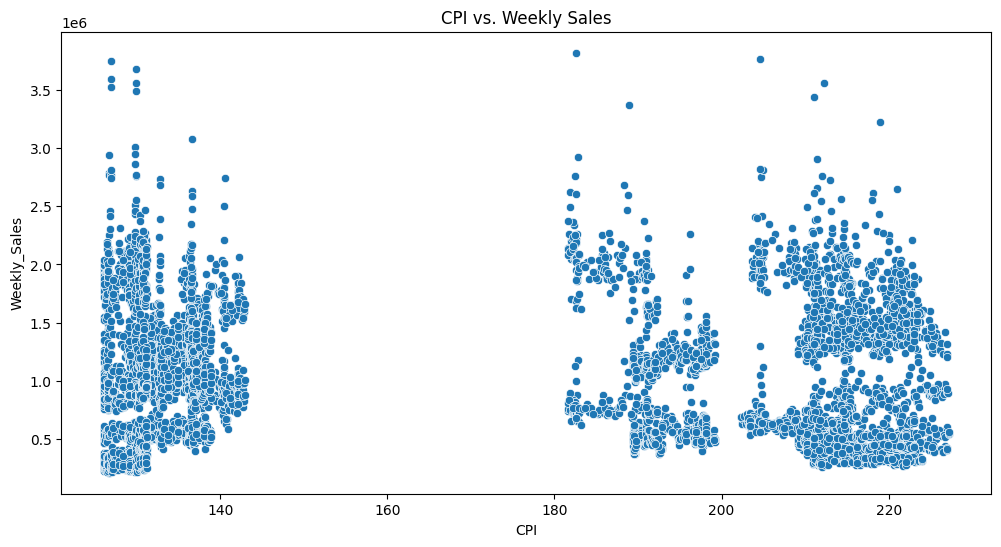

In [19]:
# CPI vs. Weekly Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('CPI vs. Weekly Sales')
plt.show()

## Top performing stores according to the historical data.


In [20]:
# Top performing stores
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
print("Top Performing Stores:")
print(top_stores)

Top Performing Stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64


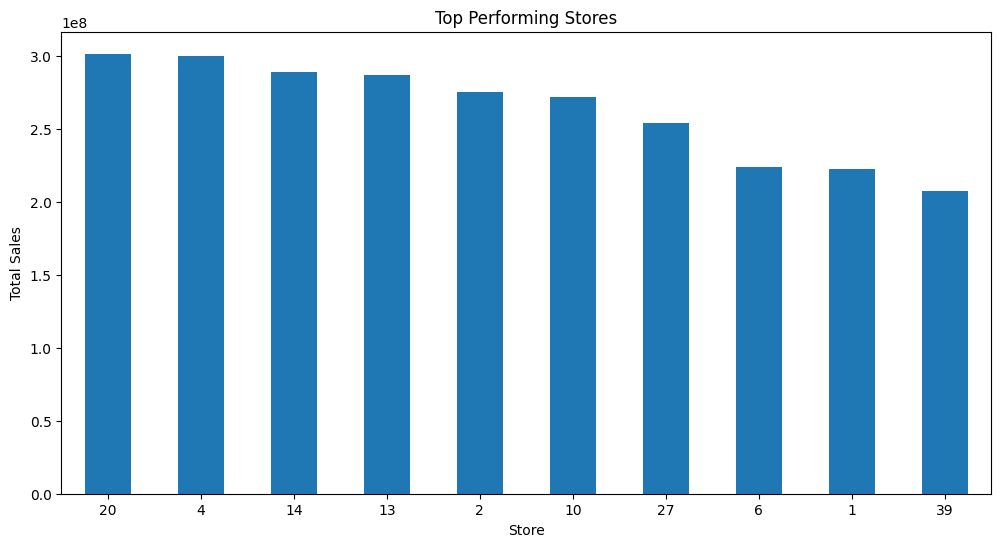

In [21]:
# Create a bar chart for top-performing stores
plt.figure(figsize=(12, 6))
top_stores.plot(kind='bar')
plt.title('Top Performing Stores')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


## The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [22]:
# Worst performing store
worst_store = df.groupby('Store')['Weekly_Sales'].sum().idxmin()
print(f"Worst Performing Store: Store {worst_store}")

Worst Performing Store: Store 33


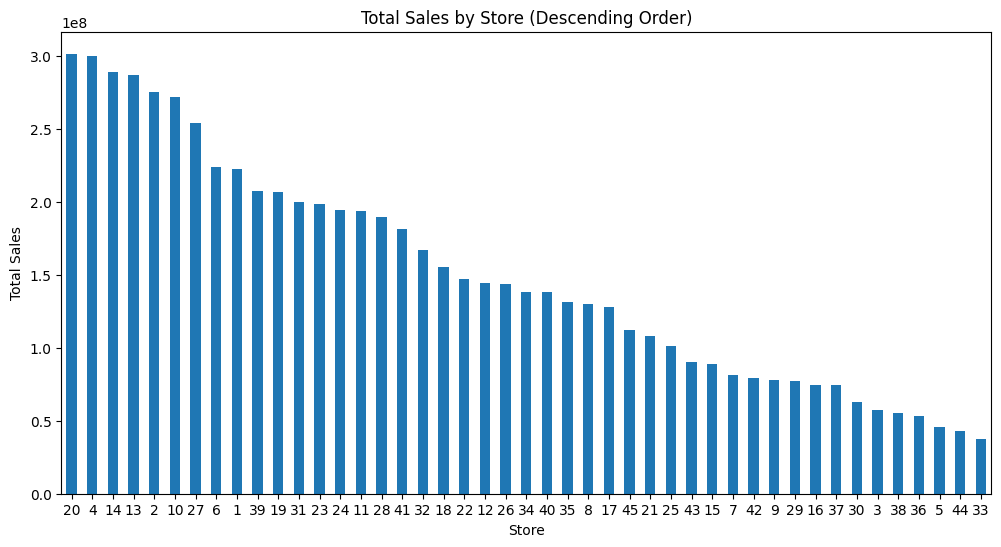

In [23]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()

# Sort the 'store_sales' Series in descending order
store_sales = store_sales.sort_values(ascending=False)

# Create a bar chart with sorted data
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar')
plt.title('Total Sales by Store (Descending Order)')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

In [24]:
# Difference between highest and lowest performing stores
max_sales = df.groupby('Store')['Weekly_Sales'].sum().max()
min_sales = df.groupby('Store')['Weekly_Sales'].sum().min()
difference = max_sales - min_sales
print(f"Difference Between Highest and Lowest Performing Stores: {difference:.2f}")

Difference Between Highest and Lowest Performing Stores: 264237570.50


## Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [25]:
# Create a pivot table for sales data by store and date
sales_data = df.pivot_table(index='Date', columns='Store', values='Weekly_Sales')
sales_data.head()

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-10,1453329.50,1827440.43,358784.10,1842821.02,283178.12,1328468.89,448998.73,804105.49,495692.19,1645892.97,...,422169.47,529877.93,360256.58,1219583.91,891152.33,1109216.35,481523.93,657108.77,300152.45,690007.76
2010-02-04,1594968.28,2066187.72,423294.40,1979247.12,331406.00,1770333.90,561145.14,914500.91,545206.32,2138651.97,...,435972.82,540189.70,368929.55,1463942.62,1041202.13,1168826.39,505907.41,650102.80,286197.50,877235.96
2010-02-07,1492418.14,2003940.64,381151.72,1881337.21,305993.27,1759777.25,575570.77,852333.75,528832.54,1845893.87,...,434252.15,498292.53,361181.48,1352547.70,1087578.78,1273279.79,507168.80,667353.79,300628.19,800147.84
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65


In [26]:
# Let's ask the user to provide us the store number for which the user wants to forecast. Note it should be between 1 and 45
store_id = int(input("Enter the store id:"))
sales_series = sales_data[store_id]
sales_series

Enter the store id:1


Date
2010-01-10    1453329.50
2010-02-04    1594968.28
2010-02-07    1492418.14
2010-02-19    1611968.17
2010-02-26    1409727.59
                 ...    
2012-10-08    1592409.97
2012-10-19    1508068.77
2012-10-26    1493659.74
2012-11-05    1611096.05
2012-12-10    1573072.81
Name: 1, Length: 143, dtype: float64

In [27]:
# Split the data into training and test sets
train_size = int(0.8 * len(sales_series))
train_data = sales_series[:train_size]
test_data = sales_series[train_size:]

In [28]:
len(train_data), len(test_data)

(114, 29)

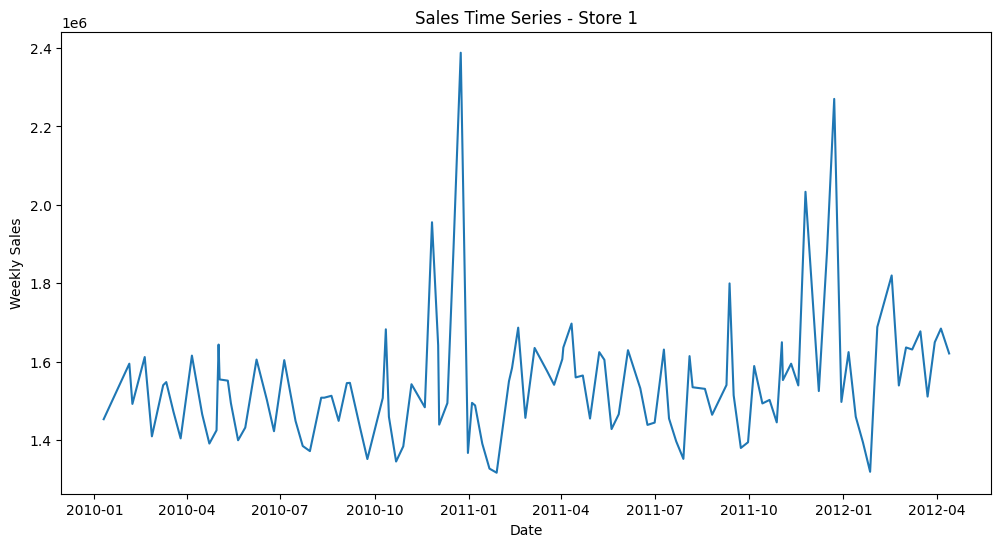

In [29]:
# Visualize the sales time series
plt.figure(figsize=(12, 6))
plt.plot(train_data)
plt.title(f'Sales Time Series - Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

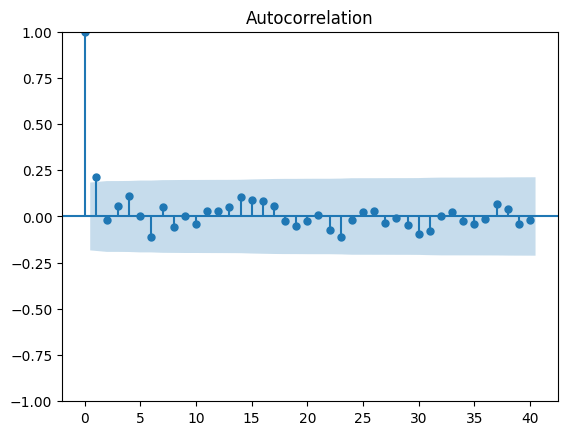

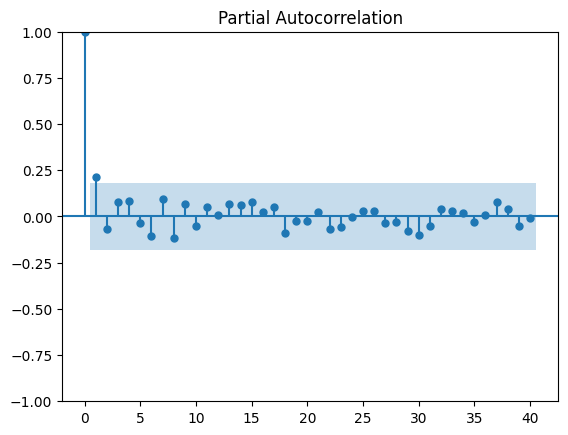

In [30]:
# Determine the order of differencing and identify seasonality
# ACF and PACF plots
plot_acf(train_data, lags=40)
plot_pacf(train_data, lags=40)
plt.show()

In [ ]:
from IPython.display import clear_output
# Initial parameters for the SARIMA model
p = d = q = range(0, 2)  # P, D, Q orders
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(product(p, d, q))]  # Seasonal P, D, Q orders

# Find the best parameters using grid search and AIC
best_aic = np.inf
best_order = None
best_seasonal_order = None

for order in [(x[0], x[1], x[2]) for x in list(product(p, d, q))]:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except Exception as e:
            continue

In [32]:
# Fit the SARIMA model with the best parameters
best_model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False,enforce_invertibility=False)
best_results = best_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [33]:
# Forecast sales for the test period
forecast_periods = len(test_data)
forecast = best_results.get_forecast(steps=forecast_periods)
forecast_values = forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(test_data, forecast_values)
mse = mean_squared_error(test_data, forecast_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_data, forecast_values)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 153554.14
Mean Squared Error (MSE): 42281787635.80
Root Mean Squared Error (RMSE): 205625.36
Mean Absolute Percentage Error (MAPE): 0.09%


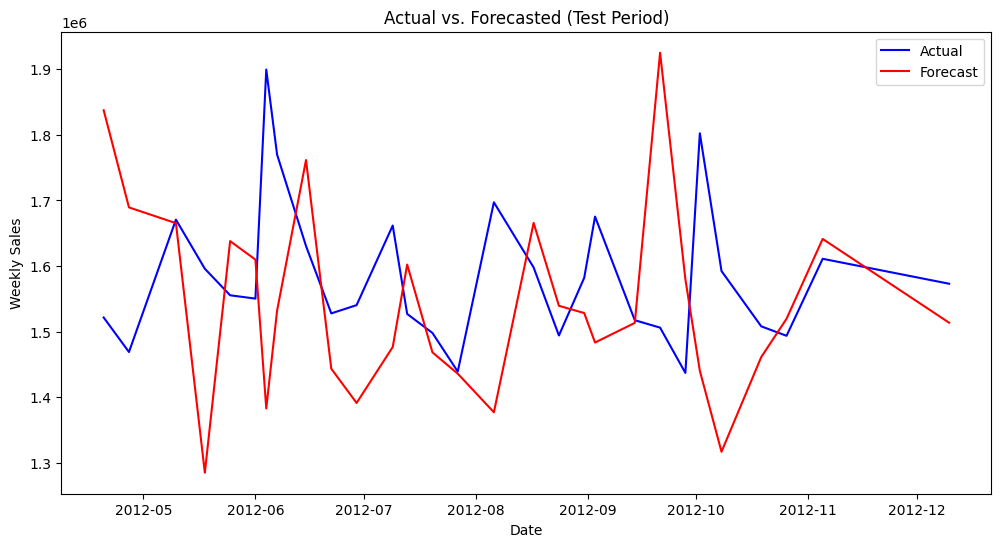

In [35]:
# Plot the actual vs. forecasted values for the test period
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual', color='blue')
plt.plot(test_data.index, forecast_values.values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.title('Actual vs. Forecasted (Test Period)')
plt.show()

Let's try with Normalizing our weekly sales to see if it improves the prediction

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
# Min-Max scaling
scaler = MinMaxScaler()
sales_series_scaled = scaler.fit_transform(sales_series.values.reshape(-1, 1))
sales_series_scaled = pd.Series(sales_series_scaled.flatten(), index=sales_series.index)
sales_series_scaled

Date
2010-01-10    0.127380
2010-02-04    0.259623
2010-02-07    0.163875
2010-02-19    0.275495
2010-02-26    0.086670
                ...   
2012-10-08    0.257234
2012-10-19    0.178488
2012-10-26    0.165035
2012-11-05    0.274680
2012-12-10    0.239180
Length: 143, dtype: float64

In [38]:
# Split the data into training and test sets
train_data_scaled = sales_series_scaled[:train_size]
test_data_scaled = sales_series_scaled[train_size:]

In [39]:
len(train_data_scaled) , len(test_data_scaled)

(114, 29)

In [ ]:
from IPython.display import clear_output

# Initial parameters for the SARIMA model
p = d = q = range(0, 2)  # P, D, Q orders
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(product(p, d, q))]  # Seasonal P, D, Q orders

# Find the best parameters using grid search and AIC
best_aic = np.inf
best_order = None
best_seasonal_order = None

for order in [(x[0], x[1], x[2]) for x in list(product(p, d, q))]:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(train_data_scaled, order=order, seasonal_order=seasonal_order, enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except Exception as e:
            continue

In [40]:
# Train the SARIMA model on the training data
model_scaled = SARIMAX(train_data_scaled, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model_scaled.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [41]:
# Forecast sales for the test period
forecast_periods = len(test_data_scaled)
forecast = results.get_forecast(steps=forecast_periods)
forecast_values = forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [42]:
forecast_values

114    0.445107
115    0.301732
116    0.299333
117    0.117368
118    0.337958
119    0.315664
120    0.121962
121    0.189351
122    0.373571
123    0.217188
124    0.132253
125    0.158706
126    0.333823
127    0.164569
128    0.111612
129    0.062211
130    0.337331
131    0.243958
132    0.237978
133    0.175776
134    0.241563
135    0.546198
136    0.238604
137    0.099791
138    0.079188
139    0.265338
140    0.207193
141    0.245417
142    0.168639
Name: predicted_mean, dtype: float64

In [43]:
# Inverse transform the forecasted values to the original scale
forecast_values_original_scale = scaler.inverse_transform(forecast_values.values.reshape(-1, 1))
forecast_values_original_scale = pd.Series(forecast_values_original_scale.flatten(), index=test_data.index)


In [44]:
forecast_values_original_scale

Date
2012-04-20    1.793632e+06
2012-04-27    1.640069e+06
2012-05-10    1.637500e+06
2012-05-18    1.442606e+06
2012-05-25    1.678869e+06
2012-06-01    1.654991e+06
2012-06-04    1.447527e+06
2012-06-07    1.519704e+06
2012-06-15    1.717013e+06
2012-06-22    1.549519e+06
2012-06-29    1.458549e+06
2012-07-09    1.486882e+06
2012-07-13    1.674440e+06
2012-07-20    1.493161e+06
2012-07-27    1.436441e+06
2012-08-06    1.383530e+06
2012-08-17    1.678198e+06
2012-08-24    1.578190e+06
2012-08-31    1.571785e+06
2012-09-03    1.505165e+06
2012-09-14    1.575626e+06
2012-09-21    1.901905e+06
2012-09-28    1.572456e+06
2012-10-02    1.423780e+06
2012-10-08    1.401714e+06
2012-10-19    1.601089e+06
2012-10-26    1.538813e+06
2012-11-05    1.579754e+06
2012-12-10    1.497520e+06
dtype: float64

In [45]:
# Calculate evaluation metrics on the original scale
actual_values_original_scale = scaler.inverse_transform(test_data_scaled.values.reshape(-1, 1))
actual_values_original_scale = pd.Series(actual_values_original_scale.flatten(), index=test_data.index)

In [46]:
mae = mean_absolute_error(actual_values_original_scale, forecast_values_original_scale)
mse = mean_squared_error(actual_values_original_scale, forecast_values_original_scale)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual_values_original_scale, forecast_values_original_scale)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 142839.98
Mean Squared Error (MSE): 34642619559.41
Root Mean Squared Error (RMSE): 186125.28
Mean Absolute Percentage Error (MAPE): 0.09%


In [47]:
forecast_values_original_scale.values - actual_values_original_scale.values

array([ 272054.14861875,  171140.89203979,  -33285.99900616,
       -153295.53004893,  123424.84284579,  104621.45522184,
       -452149.65173571, -250149.95906864,   86406.19300186,
         21673.08869564,  -81872.71341171, -174885.31477966,
        147426.29247682,   -4793.78161234,   -2682.36792999,
       -313700.91652826,   80329.919815  ,   84067.93121295,
        -10297.94326745, -170266.28920703,   58196.73852175,
        395778.78716513,  135396.56462479, -378696.95302477,
       -190695.90935496,   93020.71069239,   45153.61060849,
        -31342.30619895,  -75552.58735904])

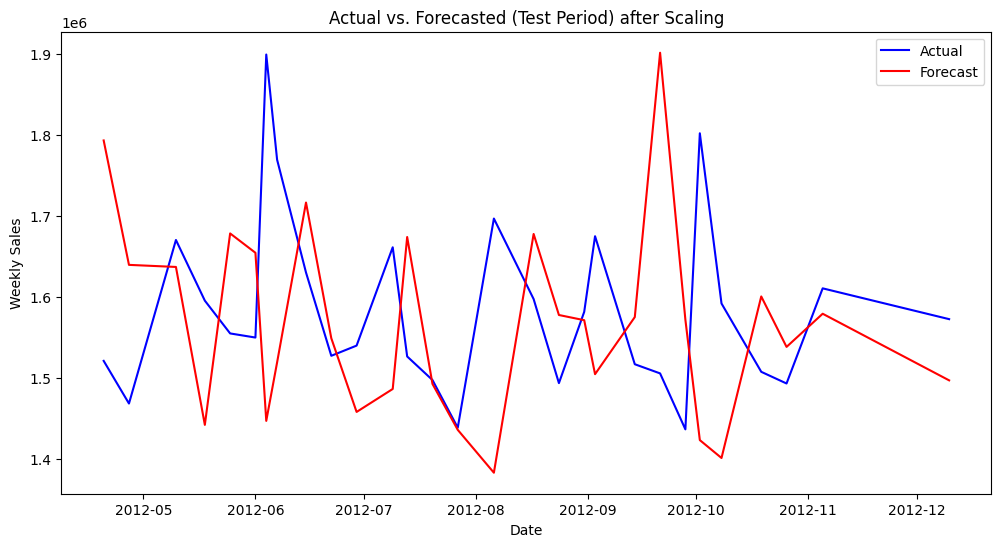

In [48]:
# Plot the actual vs. forecasted values for the test period after Scaling
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, actual_values_original_scale.values, label='Actual', color='blue')
plt.plot(test_data.index, forecast_values_original_scale.values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.title('Actual vs. Forecasted (Test Period) after Scaling')
plt.show()

Although error has reduced significantly , still the model is not performing well . So let's try **`LSTM`** Model

In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [50]:
# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

In [51]:
# Create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        X = data[i:i + seq_length]
        y = data[i + seq_length]
        sequences.append((X, y))
    return sequences

In [52]:
seq_length = 10
train_sequences = create_sequences(train_data_scaled, seq_length)
test_sequences = create_sequences(test_data_scaled, seq_length)

X_train, y_train = zip(*train_sequences)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = zip(*test_sequences)
X_test, y_test = np.array(X_test), np.array(y_test)


In [53]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

Epoch 1/50
4/4 [==============================] - 6s 21ms/step - loss: 0.0840
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0695
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0573
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0468
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0367
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0294
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0258
Epoch 8/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0262
Epoch 9/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0272
Epoch 10/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0264
Epoch 11/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0254
Epoch 12/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0255
Epoch 13/50
4/4 [==============================] - 0s 17ms/st

In [55]:
# Inverse transform the scaled predictions to get actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

In [56]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_actual, y_pred_actual)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 76295.33
Mean Squared Error (MSE): 8865988978.40
Root Mean Squared Error (RMSE): 94159.38
Mean Absolute Percentage Error (MAPE): 0.05%


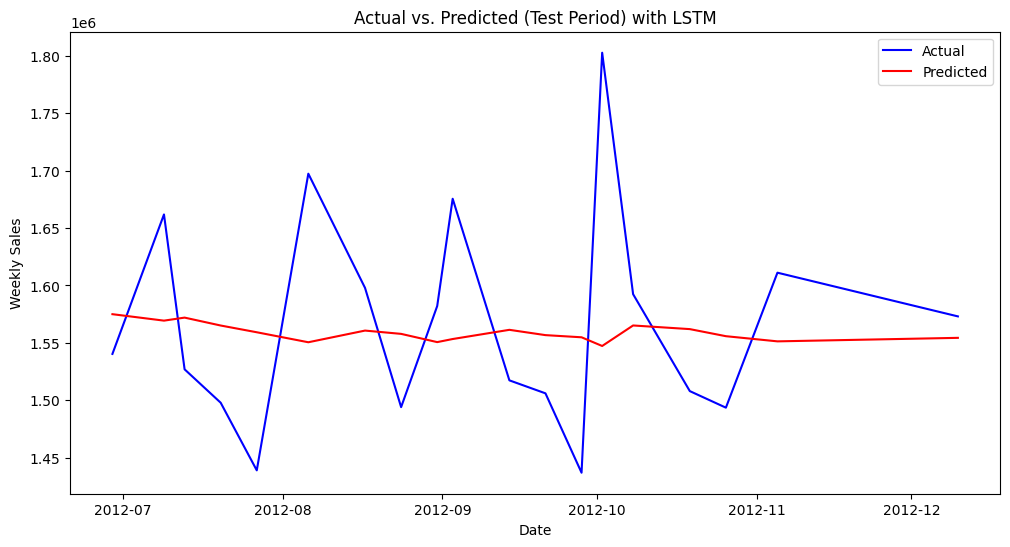

In [57]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length:], y_test_actual, label='Actual', color='blue')
plt.plot(test_data.index[seq_length:], y_pred_actual, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.title('Actual vs. Predicted (Test Period) with LSTM')
plt.show()

We can see that LSTM Model is performing poorly . In such scenarios , we would need more data to improve our prediction .So far , the best model that we have made was the model 2 , saved in the variable ***results*** . We will use this to predict the forecast of next 12 weeks .

For that we will normalize the whole dataset and then run the sarima model on it

In [65]:
scaler = MinMaxScaler()
sales_series_scaled = scaler.fit_transform(sales_series.values.reshape(-1, 1))
sales_series_scaled = pd.Series(sales_series_scaled.flatten(), index=sales_series.index)
sales_series_scaled

Date
2010-01-10    0.127380
2010-02-04    0.259623
2010-02-07    0.163875
2010-02-19    0.275495
2010-02-26    0.086670
                ...   
2012-10-08    0.257234
2012-10-19    0.178488
2012-10-26    0.165035
2012-11-05    0.274680
2012-12-10    0.239180
Length: 143, dtype: float64

In [66]:
final_model = SARIMAX(sales_series_scaled, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = final_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [67]:
# Forecast sales for the next 12 weeks
forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [68]:
# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a date range for the forecasted period
forecast_dates = pd.date_range(start=sales_series.index[-1], periods=forecast_periods + 1, freq='W')[1:]

In [73]:
actual_values_original_scale = scaler.inverse_transform(forecast_values.values.reshape(-1, 1))
actual_values_original_scale

array([[1677383.96224525],
       [1599783.83856779],
       [1856577.19733354],
       [1672016.40971275],
       [1817727.34140689],
       [1591109.20324553],
       [1967401.68961579],
       [2410365.421213  ],
       [1513687.33367672],
       [1641067.12963958],
       [1555365.509052  ],
       [1473999.79652379]])

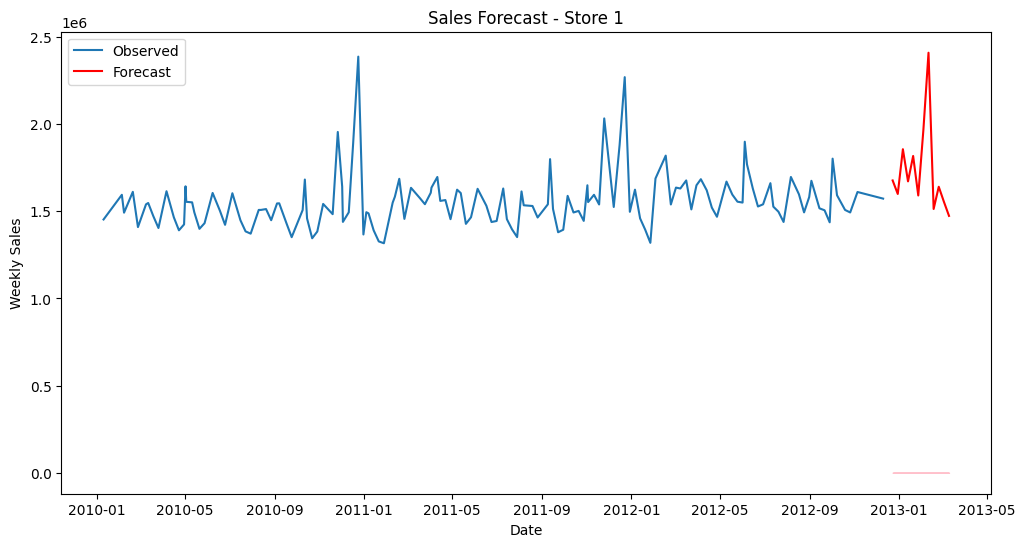

In [74]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_series.index, sales_series.values, label='Observed')
plt.plot(forecast_dates, actual_values_original_scale, label='Forecast', color='red')
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.title(f'Sales Forecast - Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()